In [1]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:

#Since we would be using these names a lot let us keep shorter names with no capital letters or spaces

df = df.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'furnace_slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'super_plasticizer', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ': 'strength'})

df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'strength'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   furnace_slag       1030 non-null   float64
 2   fly_ash            1030 non-null   float64
 3   water              1030 non-null   float64
 4   super_plasticizer  1030 non-null   float64
 5   coarse_agg         1030 non-null   float64
 6   fine_agg           1030 non-null   float64
 7   age                1030 non-null   int64  
 8   strength           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
#check for nulls

print(df.isnull().sum())

cement               0
furnace_slag         0
fly_ash              0
water                0
super_plasticizer    0
coarse_agg           0
fine_agg             0
age                  0
strength             0
dtype: int64


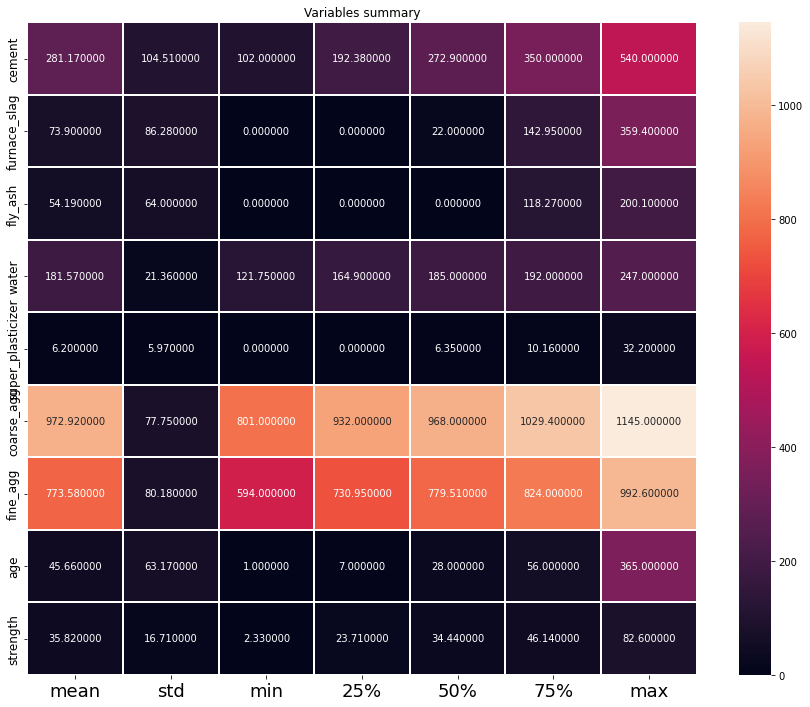

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

<AxesSubplot:xlabel='strength', ylabel='Density'>

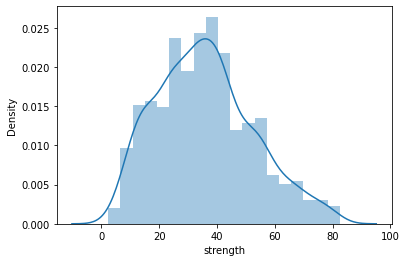

In [11]:
sns.distplot(df['strength'])

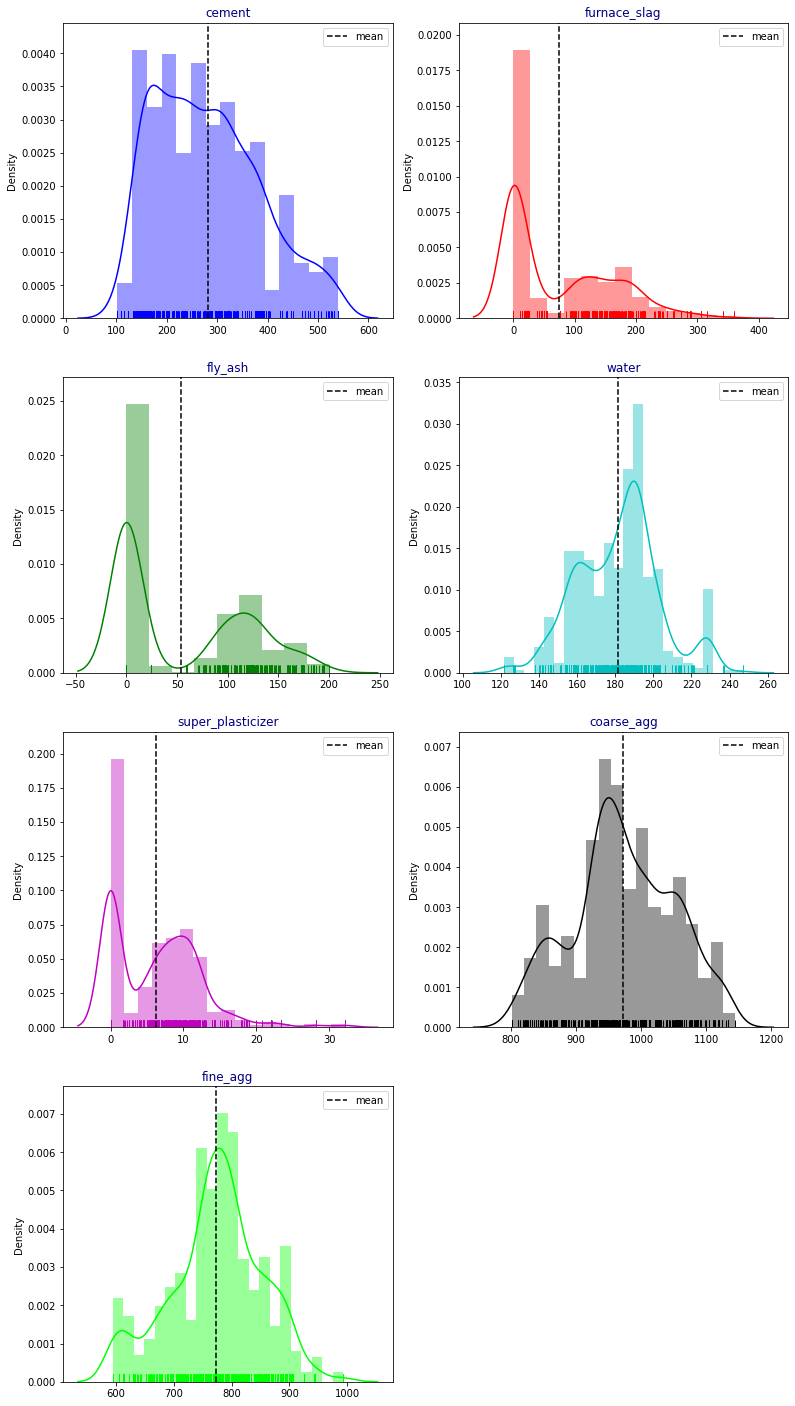

In [12]:
import itertools

cols = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

<AxesSubplot:>

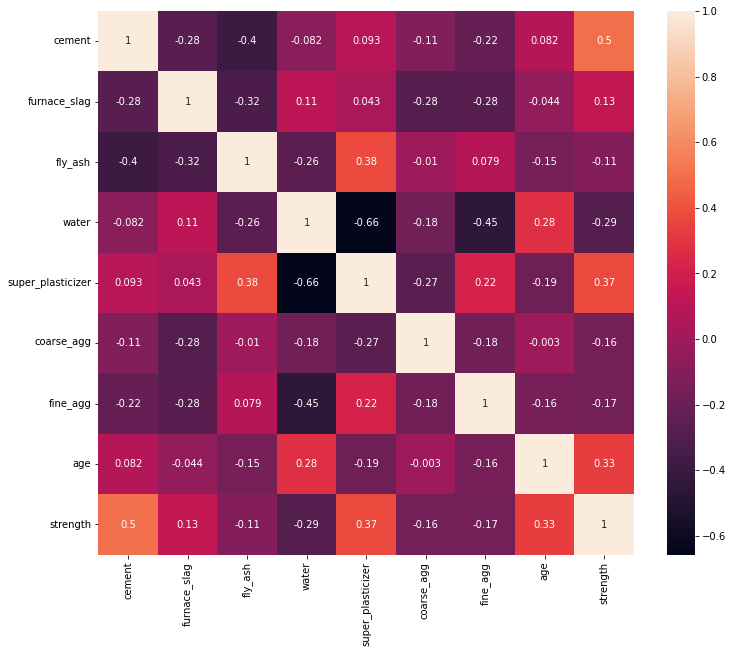

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

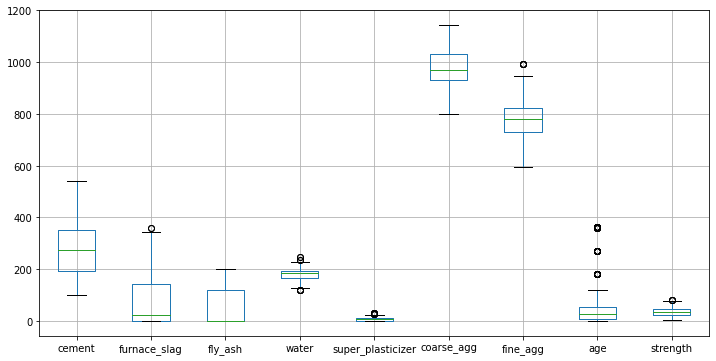

In [14]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.show()

In [15]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
df['furnace_slag'] = df['furnace_slag'].replace((0.0),np.nan)
df['furnace_slag'] = df['furnace_slag'].fillna(df['furnace_slag'].median())
df['fly_ash'] = df['fly_ash'].replace((0.0),np.nan)
df['fly_ash'] = df['fly_ash'].fillna(df['fly_ash'].median())
df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,133.85,121.35,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,133.85,121.35,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.50,121.35,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.50,121.35,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.40,121.35,192.0,0.0,978.4,825.5,360,44.296075


### Split

In [17]:
X = df.drop('strength',axis=1)
y = df['strength'].to_frame()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

y_train = sc.fit_transform(y_train)
y_test= sc.fit_transform(y_test)


In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((824, 8), (824, 1), (206, 8), (206, 1))

## LSTM

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]//8,8)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]//8,8)

In [23]:
X_train.shape,y_train.shape

((824, 1, 8), (824, 1))

In [24]:
model = Sequential()
model.add(LSTM(288, input_shape=(1, 8), return_sequences = True))
model.add(LSTM(288,activation='relu'))
model.add(Dense(1,activation='tanh'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 288)            342144    
                                                                 
 lstm_1 (LSTM)               (None, 288)               664704    
                                                                 
 dense (Dense)               (None, 1)                 289       
                                                                 
Total params: 1,007,137
Trainable params: 1,007,137
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[r2_score])
model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
4/4 - 4s - loss: 0.9847 - r2_score: 0.0144 - 4s/epoch - 992ms/step
Epoch 2/100
4/4 - 0s - loss: 0.9296 - r2_score: 0.0723 - 146ms/epoch - 36ms/step
Epoch 3/100
4/4 - 0s - loss: 0.8584 - r2_score: 0.1482 - 155ms/epoch - 39ms/step
Epoch 4/100
4/4 - 0s - loss: 0.7678 - r2_score: 0.2314 - 148ms/epoch - 37ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6607 - r2_score: 0.3411 - 151ms/epoch - 38ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5624 - r2_score: 0.4594 - 149ms/epoch - 37ms/step
Epoch 7/100
4/4 - 0s - loss: 0.4923 - r2_score: 0.4963 - 150ms/epoch - 37ms/step
Epoch 8/100
4/4 - 0s - loss: 0.4502 - r2_score: 0.5517 - 151ms/epoch - 38ms/step
Epoch 9/100
4/4 - 0s - loss: 0.4256 - r2_score: 0.5631 - 149ms/epoch - 37ms/step
Epoch 10/100
4/4 - 0s - loss: 0.4120 - r2_score: 0.5482 - 226ms/epoch - 56ms/step
Epoch 11/100
4/4 - 0s - loss: 0.3996 - r2_score: 0.6061 - 140ms/epoch - 35ms/step
Epoch 12/100
4/4 - 0s - loss: 0.3900 - r2_score: 0.6062 - 169ms/epoch - 42ms/step
Epoch 13/100
4/4 - 0s - los

In [27]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

## Evaluate

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [29]:
#r2score
r2_score(y_train, trainPredict),r2_score(y_test, testPredict)

(0.7755114447915981, 0.719529873561788)

In [30]:
# mse
mean_squared_error(y_train, trainPredict),mean_squared_error(y_test, testPredict)

(0.22448855520840194, 0.28047012643821195)

In [31]:
#mae
mean_absolute_error(y_train, trainPredict),mean_absolute_error(y_test, testPredict)

(0.3635964705794976, 0.40066961978810633)

In [32]:
#rmse
mean_squared_error(y_train, trainPredict,squared=False),mean_squared_error(y_test, testPredict,squared=False)

(0.47380223216907913, 0.5295943036308188)